## Knowledge distillation training Mobilenet on CASIA

In [ ]:
import os
import glob2
import pickle
import numpy as np
import tensorflow as tf
import sys
from tensorflow import keras

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

import train, losses
import tensorflow_addons as tfa

data_basic_path = '/datasets/'
data_path = data_basic_path + 'faces_casia_112x112_folders'
eval_paths = [data_basic_path + ii for ii in ['faces_casia/lfw.bin', 'faces_casia/cfp_fp.bin', 'faces_casia/agedb_30.bin']]

train.print_buildin_models()

### Baseline

In [ ]:
""" Train typical `ArcFace` loss as baseline, dropout=0, emb_shape=512 """
basic_model = train.buildin_models("mobilenet", dropout=0, emb_shape=512, output_layer='E')
tt = train.Train(data_path, save_path='TT_mobilenet_base_emb512_dr0_bs400.h5', eval_paths=eval_paths,
    basic_model=basic_model, model=None, lr_base=0.1, lr_decay=0.1, lr_decay_steps=[20, 30],
    batch_size=400, random_status=0, output_wd_multiply=1)

optimizer = tfa.optimizers.SGDW(learning_rate=0.1, weight_decay=5e-4, momentum=0.9)
sch = [
    {"loss": losses.ArcfaceLoss(scale=16), "epoch": 5, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(scale=32), "epoch": 5},
    {"loss": losses.ArcfaceLoss(scale=64), "epoch": 40},
]
tt.train(sch, 0)

In [ ]:
""" Train typical `ArcFace` loss as baseline, dropout=0.4, emb_shape=512 """
basic_model = train.buildin_models("mobilenet", dropout=0.4, emb_shape=512, output_layer='E')
tt = train.Train(data_path, save_path='TT_mobilenet_base_emb512_dr4_bs400.h5', eval_paths=eval_paths,
    basic_model=basic_model, model=None, lr_base=0.1, lr_decay=0.1, lr_decay_steps=[20, 30],
    batch_size=400, random_status=0, output_wd_multiply=1)

optimizer = tfa.optimizers.SGDW(learning_rate=0.1, weight_decay=5e-4, momentum=0.9)
sch = [
    {"loss": losses.ArcfaceLoss(scale=16), "epoch": 5, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(scale=32), "epoch": 5},
    {"loss": losses.ArcfaceLoss(scale=64), "epoch": 40},
]
tt.train(sch, 0)

### Knowledge distillation using r34 as teacher model

In [ ]:
""" Extract CASIA embedding using trained r34 model """
import data_distiller
model_file = './checkpoints/NNNN_resnet34_MXNET_E_sgdw_5e4_dr4_lr1e1_wd10_random0_arc32_E1_arcT4_BS512_casia_basic_agedb_30_epoch_37_0.946667.h5'
new_data_path = data_distiller.data_distiller(data_path, model_file)
# >>>> Output: faces_casia_112x112_folders_shuffle_label_embs_normed_512.npz

In [ ]:
""" Train knowledge distillation model, dropout=0, emb_shape=512 """
basic_model = train.buildin_models("mobilenet", dropout=0, emb_shape=512, output_layer='E')
tt = train.Train(new_data_path, save_path='TT_mobilenet_distill_emb512_dr0_bs400.h5', eval_paths=eval_paths,
    basic_model=basic_model, model=None, lr_base=0.1, lr_decay=0.1, lr_decay_steps=[20, 30],
    batch_size=400, random_status=0, output_wd_multiply=1)

optimizer = tfa.optimizers.SGDW(learning_rate=0.1, weight_decay=5e-4, momentum=0.9)
sch = [
    {"loss": losses.ArcfaceLoss(scale=16), "epoch": 5, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(scale=32), "epoch": 5},
    {"loss": losses.ArcfaceLoss(scale=64), "epoch": 40},
]
tt.train(sch, 0)

### Knowledge distillation using MXNet r100 as teacher model

In [ ]:
""" Extract CASIA embedding using trained MXNet r100 model """
import data_distiller
model_file = '../tdFace-flask.mxnet/subcenter-arcface-logs/r100-arcface-msfdrop75/model,0'
new_data_path = data_distiller.data_distiller(data_path, model_file)
# >>>> Output: faces_casia_112x112_folders_shuffle_label_embs_normed_512.npz

In [ ]:
""" Train knowledge distillation model, dropout=0, emb_shape=512 """
basic_model = train.buildin_models("mobilenet", dropout=0, emb_shape=512, output_layer='E')
tt = train.Train(new_data_path, save_path='TT_mobilenet_distill_emb512_dr0_bs400_r100.h5', eval_paths=eval_paths,
    basic_model=basic_model, model=None, lr_base=0.1, lr_decay=0.1, lr_decay_steps=[20, 30],
    batch_size=400, random_status=0, output_wd_multiply=1)

optimizer = tfa.optimizers.SGDW(learning_rate=0.1, weight_decay=5e-4, momentum=0.9)
sch = [
    {"loss": losses.ArcfaceLoss(scale=16), "epoch": 5, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(scale=32), "epoch": 5},
    {"loss": losses.ArcfaceLoss(scale=64), "epoch": 40},
]
tt.train(sch, 0)

In [ ]:
""" Train knowledge distillation model, dropout=0.4, emb_shape=512 """
basic_model = train.buildin_models("mobilenet", dropout=0.4, emb_shape=512, output_layer='E')
tt = train.Train(new_data_path, save_path='TT_mobilenet_distill_emb512_dr4_bs400_2.h5', eval_paths=eval_paths,
    basic_model=basic_model, model=None, lr_base=0.1, lr_decay=0.1, lr_decay_steps=[20, 30],
    batch_size=400, random_status=0, output_wd_multiply=1)

optimizer = tfa.optimizers.SGDW(learning_rate=0.1, weight_decay=5e-4, momentum=0.9)
sch = [
    {"loss": losses.ArcfaceLoss(scale=16), "epoch": 5, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(scale=32), "epoch": 5},
    {"loss": losses.ArcfaceLoss(scale=64), "epoch": 40},
]
tt.train(sch, 0)

### Train with distill 64

In [ ]:
""" r100 as teacher model, dropout=0.4, emb_shape=512, SGDW """
basic_model = train.buildin_models("mobilenet", dropout=0.4, emb_shape=512, output_layer='E')
tt = train.Train(new_data_path, save_path='TT_mobilenet_distill_64_emb512_dr4_arcT4_bs400_r100.h5', eval_paths=eval_paths,
    basic_model=basic_model, model=None, lr_base=0.1, lr_decay=0.1, lr_decay_steps=[20, 30],
    batch_size=400, random_status=0, output_wd_multiply=1)

optimizer = tfa.optimizers.SGDW(learning_rate=0.1, weight_decay=5e-4, momentum=0.9)
sch = [
    {"loss": losses.ArcfaceLoss(scale=16), "epoch": 5, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(scale=32), "epoch": 5},
    {"loss": losses.ArcfaceLoss(scale=64), "epoch": 40},
]
tt.train(sch, 0)

In [ ]:
""" r100 as teacher model, dropout=0.4, emb_shape=512, AdamW """
basic_model = train.buildin_models("mobilenet", dropout=0.4, emb_shape=512, output_layer='E')
tt = train.Train(new_data_path, save_path='TT_mobilenet_distill_64_emb512_dr4_adamw_lr1e3_arcT4_bs400_r100.h5', eval_paths=eval_paths,
    basic_model=basic_model, model=None, lr_base=0.1, lr_decay=0.1, lr_decay_steps=[20, 30],
    batch_size=400, random_status=0, output_wd_multiply=1)

optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=5e-5)
sch = [
    {"loss": losses.ArcfaceLoss(scale=16), "epoch": 5, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(scale=32), "epoch": 5},
    {"loss": losses.ArcfaceLoss(scale=64), "epoch": 40},
]
tt.train(sch, 0)

### Result and Plot

| Teacher | Dropout | Optimizer | distill | Max lfw    | Max cfp_fp | Max agedb_30 |
| ------- | ------- | --------- | ------- | ---------- | ---------- | ------------ |
| None    | 0       | SGDW      | 7       | 0.9838     | 0.8730     | 0.8697       |
| None    | 0.4     | SGDW      | 7       | 0.9837     | 0.8491     | 0.8745       |
| r34     | 0       | SGDW      | 7       | 0.9890     | 0.9099     | 0.9058       |
| r100    | 0       | SGDW      | 7       | 0.9900     | 0.9111     | 0.9068       |
| r100    | 0.4     | SGDW      | 7       | 0.9905     | 0.9170     | 0.9112       |
| r100    | 0.4     | SGDW      | 64      | **0.9938** | 0.9333     | **0.9435**   |
| r100    | 0.4     | AdamW     | 64      | 0.9920     | **0.9346** | 0.9387       |

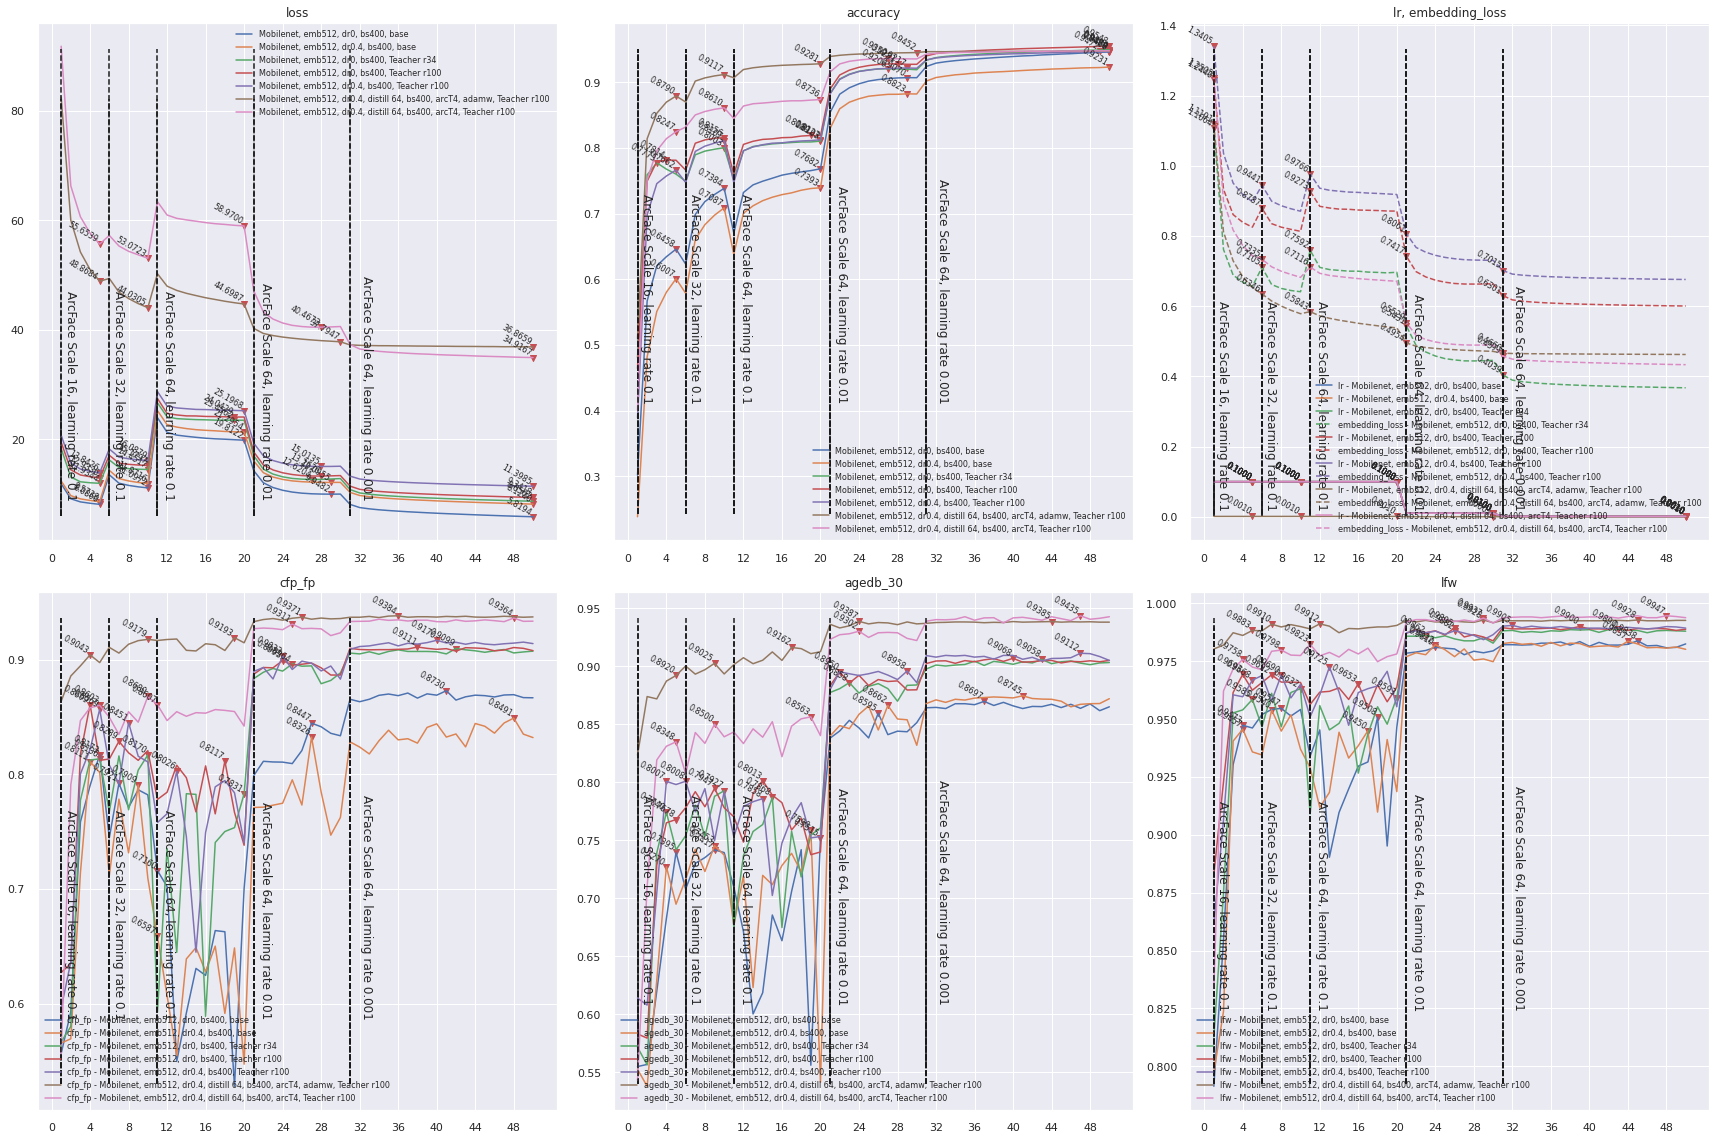

In [4]:
import plot
axes = None
customs = ["cfp_fp", "agedb_30", "lfw", "lr", "embedding_loss"]
epochs = [5, 5, 10, 10, 40]
names = ["ArcFace Scale 16, learning rate 0.1", "ArcFace Scale 32, learning rate 0.1", "ArcFace Scale 64, learning rate 0.1", "ArcFace Scale 64, learning rate 0.01", "ArcFace Scale 64, learning rate 0.001"]
axes, _ = plot.hist_plot_split("checkpoints/TT_mobilenet_base_emb512_dr0_bs400_hist.json", epochs, axes=axes, customs=customs, names=names, fig_label="Mobilenet, emb512, dr0, bs400, base")
axes, _ = plot.hist_plot_split("checkpoints/TT_mobilenet_base_emb512_dr4_bs400_hist.json", epochs, axes=axes, customs=customs, fig_label="Mobilenet, emb512, dr0.4, bs400, base")

axes, _ = plot.hist_plot_split("checkpoints/TT_mobilenet_distill_emb512_dr0_bs400_hist.json", epochs, axes=axes, customs=customs, fig_label="Mobilenet, emb512, dr0, bs400, Teacher r34")

axes, _ = plot.hist_plot_split("checkpoints/TT_mobilenet_distill_emb512_dr0_bs400_r100_hist.json", epochs, axes=axes, customs=customs, fig_label="Mobilenet, emb512, dr0, bs400, Teacher r100")
axes, _ = plot.hist_plot_split("checkpoints/TT_mobilenet_distill_emb512_dr4_bs400_2_hist.json", epochs, axes=axes, customs=customs, fig_label="Mobilenet, emb512, dr0.4, bs400, Teacher r100")

axes, _ = plot.hist_plot_split("checkpoints/TT_mobilenet_distill_64_emb512_dr4_adamw_lr1e3_arcT4_bs400_r100_hist.json", epochs, axes=axes, customs=customs, fig_label="Mobilenet, emb512, dr0.4, distill 64, bs400, arcT4, adamw, Teacher r100")
axes, _ = plot.hist_plot_split("checkpoints/TT_mobilenet_distill_64_emb512_dr4_arcT4_bs400_r100_hist.json", epochs, axes=axes, customs=customs, fig_label="Mobilenet, emb512, dr0.4, distill 64, bs400, arcT4, Teacher r100")